Responsibility Correlations
===

Notebook to create an image describing the correlations of the responsibilities.

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import sys
sys.path.append("../annotation_data")

In [3]:
from responsibility import *

In [4]:
import pandas as pd
import numpy as np
import sklearn
import sklearn.metrics
import os

In [5]:
import matplotlib.pyplot as plt
import matplotlib.dates as md
import matplotlib
import pylab as pl

In [6]:
candidate_sites_working_dir = "/home/srivbane/shared/caringbridge/data/projects/qual-health-journeys/identify_candidate_sites"
valid_classification_sites_filename = os.path.join(candidate_sites_working_dir, "valid_classification_sites_filtered.txt")
with open(valid_classification_sites_filename, 'r') as infile:
    valid_sites = [int(line.strip()) for line in infile.readlines() if line.strip() != ""]
len(valid_sites)

4946

In [7]:
git_root_dir = !git rev-parse --show-toplevel
git_root_dir = git_root_dir[0].strip()
figure_working_dir = os.path.join(git_root_dir, "chi2019_tex/figures")
assert os.path.exists(figure_working_dir)
figure_working_dir

'/panfs/roc/groups/3/srivbane/levon003/repos/qual-health-journeys/chi2019_tex/figures'

#### Load Responsibility Annotation Data

All of this is obsolete now, jump straight to the test prediction loading.

In [8]:
high_irr_responsibility_labels

['coordinating_support',
 'sharing_medical_info',
 'compliance',
 'financial_management',
 'giving_back',
 'behavior_changes']

In [9]:
high_irr_responsibility_codes

['CS', 'SM', 'CP', 'FM', 'GB', 'BC']

In [10]:
annotated_df = get_annotated_responsibility_df()
len(annotated_df)

100%|██████████| 1913/1913 [00:30<00:00, 62.18it/s]


1895

In [11]:
annotated_df.head()

,behavior_changes_score,clinical_decisions_score,communicating_score,compliance_score,conflict_status,continued_monitoring_score,coordinating_support_score,financial_management_score,giving_back_score,info_filtering_score,is_annotated,journal_oid,journal_text,managing_transitions_score,preparation_score,responsibilities,sharing_medical_info_score,site_id,symptom_management_score
0,0.0,0.0,0.0,0.0,SINGLE USER,0.0,0.0,0.0,0.0,0.0,True,51be14196ca0041935009526,NEWLINE I will try to update this weekly if I...,0.0,0.0,[],0.0,106710,0.0
1,0.0,0.0,0.0,1.0,SINGLE USER,0.0,0.0,0.0,0.0,0.0,True,51be14196ca0041935009660,NEWLINE Well it is Monday and here is my upda...,0.0,0.0,"[sharing_medical_info, compliance]",1.0,106710,0.0
2,0.0,0.0,0.0,0.0,SINGLE USER,0.0,1.0,0.0,0.0,0.0,True,51be14196ca00419350098b4,"NEWLINE Hi,\r NEWLINE It is Tue. and I had ...",0.0,0.0,[coordinating_support],0.0,106710,0.0
3,0.0,0.0,0.0,1.0,SINGLE USER,0.0,0.0,0.0,0.0,0.0,True,51be14196ca00419350099e0,"NEWLINE Happy Tue,\r NEWLINE \r NEWLINE It ha...",0.0,0.0,"[sharing_medical_info, compliance]",1.0,106710,0.0
4,0.0,0.0,0.0,1.0,SINGLE USER,0.0,1.0,0.0,0.0,0.0,True,51be14196ca0041935009a62,NEWLINE Thanks all for all the notes.\r NEWLI...,0.0,0.0,"[coordinating_support, sharing_medical_info, c...",1.0,106710,0.0


In [12]:
y_score = annotated_df.loc[:, [resp_label + "_score" for resp_label in high_irr_responsibility_labels]].values
y_score.shape

(1895, 6)

In [13]:
y_label = (y_score >= 0.5).astype(int)
y_label.shape

(1895, 6)

In [14]:
for i, resp_label in enumerate(high_irr_responsibility_labels):
    annotated_df[resp_label + "_label"] = (annotated_df[resp_label + "_score"] >= 0.5).astype(int)

#### Load the test predictions

In [15]:
vw_working_dir = "/home/srivbane/shared/caringbridge/data/projects/qual-health-journeys/classification/responsibilities/vw"
all_preds_filepath = os.path.join(vw_working_dir, "vw_all_preds.pkl")
df = pd.read_pickle(all_preds_filepath)
len(df)

157389

In [16]:
# Get a df containing only the labels
label_df = df[[col for col in df.columns if col.endswith("_pred_label")]]
# we then reorder into the order set by the high_irr_responsibility_labels list
label_df = label_df[[label + "_pred_label" for label in high_irr_responsibility_labels]]
label_df.head()

,coordinating_support_pred_label,sharing_medical_info_pred_label,compliance_pred_label,financial_management_pred_label,giving_back_pred_label,behavior_changes_pred_label
0,0,1,1,0,0,0
1,1,1,1,0,0,0
2,1,1,1,1,1,1
3,1,1,1,1,1,1
4,1,1,1,1,1,1


In [17]:
label_df.corr()

,coordinating_support_pred_label,sharing_medical_info_pred_label,compliance_pred_label,financial_management_pred_label,giving_back_pred_label,behavior_changes_pred_label
coordinating_support_pred_label,1.000000,0.156608,0.192009,0.417438,0.430956,0.484196
sharing_medical_info_pred_label,0.156608,1.000000,0.644015,0.070677,0.070475,0.081472
compliance_pred_label,0.192009,0.644015,1.000000,0.084387,0.084707,0.097448
financial_management_pred_label,0.417438,0.070677,0.084387,1.000000,0.895306,0.849485
giving_back_pred_label,0.430956,0.070475,0.084707,0.895306,1.000000,0.851547
behavior_changes_pred_label,0.484196,0.081472,0.097448,0.849485,0.851547,1.000000


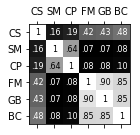

In [18]:
n_resps = len(high_irr_responsibility_codes)

corr_mat = label_df.corr()
width_in_inches = 3.3 / 2 + 0.2
height_in_inches = width_in_inches
fig, ax = plt.subplots(figsize=(width_in_inches, height_in_inches))
#plt.sca(ax)
cmap = plt.cm.gray
im = ax.matshow(corr_mat, cmap=cmap)
#plt.yticks(np.arange(0,50), ["%.2f" % th for th in thresholds])
#plt.xticks(np.arange(0,13), responsibility_labels, rotation=90)
#plt.colorbar(ax=ax)

#plt.xticks(range(n_resps), high_irr_responsibility_codes)
#plt.yticks(range(n_resps), high_irr_responsibility_codes)

ax.set_xticks(range(n_resps))
ax.set_xticklabels(high_irr_responsibility_codes)
ax.set_yticks(range(n_resps))
ax.set_yticklabels(high_irr_responsibility_codes)


for i in range(n_resps):
    for j in range(n_resps):
        val = corr_mat.iloc[i, j]
        text = ax.text(j, i, f"{val:.2f}".replace("0.", ".") if val < 1 else "1", fontsize=8,
                       ha="center", va="center", color="w" if val <= 0.6 else "k")

#cax = fig.add_axes([0.9, 0.12, 0.1, 0.75])
#fig.colorbar(im, cax=cax, orientation='vertical')
        
#plt.tight_layout()
fig.set_size_inches(width_in_inches, height_in_inches)
mat_fig_filepath = os.path.join(figure_working_dir, "responsibility_corrs.pdf")
fig.savefig(mat_fig_filepath, dpi=300)
plt.show()

In [33]:
# print propability table
for i, resp_label in enumerate(high_irr_responsibility_labels):
    resp_code = high_irr_responsibility_codes[i]
    proportion = np.sum(df[resp_label + "_pred_label"] == 1) / len(df)
    print(f"{resp_code} & {proportion * 100:5.2f} \\\\")

y_pred = df[[resp_label + "_pred_label" for resp_label in high_irr_responsibility_labels]].values
zero_resp_labelings = np.sum(np.apply_along_axis(lambda row: np.sum(row) == 0, 1, y_pred))
none_proportion = zero_resp_labelings / len(df)
print(f"None & {none_proportion * 100:5.2f} \\\\")

CS & 20.99 \\
SM & 90.24 \\
CP & 86.68 \\
FM &  4.46 \\
GB &  4.72 \\
BC &  5.95 \\
None &  7.70 \\


In [39]:
diffs = np.zeros(len(high_irr_responsibility_labels))
for i, resp_label in enumerate(high_irr_responsibility_labels):
    resp_code = high_irr_responsibility_codes[i]
    proportion = np.sum(df[resp_label + "_pred_label"] == 1) / len(df)
    true_proportion = np.sum(annotated_df[resp_label + "_label"] == 1) / len(annotated_df)
    diffs[i] = proportion - true_proportion
    print(f"{resp_code}  {proportion * 100:5.2f}  {true_proportion * 100:5.2f}  {(proportion - true_proportion) * 100:5.2f}")

CS  20.99  15.04   5.95
SM  90.24  85.91   4.33
CP  86.68  76.68  10.00
FM   4.46   3.01   1.46
GB   4.72   4.33   0.39
BC   5.95   4.06   1.89


In [42]:
diffs.mean() * 100

4.002759119488452

In [45]:
y_pred = annotated_df[[resp_label + "_label" for resp_label in high_irr_responsibility_labels]].values
zero_resp_labelings = np.sum(np.apply_along_axis(lambda row: np.sum(row) == 0, 1, y_pred))
none_proportion = zero_resp_labelings / len(annotated_df)
print(f"None & {none_proportion * 100:5.2f}")

None &  9.29


In [46]:
y_pred = df[[resp_label + "_pred_label" for resp_label in high_irr_responsibility_labels]].values
zero_resp_labelings = np.sum(np.apply_along_axis(lambda row: np.sum(row) == 0, 1, y_pred))
none_proportion = zero_resp_labelings / len(df)
print(f"None & {none_proportion * 100:5.2f}")

None &  7.70


## Cardinality analysis

In [20]:
a_df = df[df.is_annotated]
un_df = df[~df.is_annotated]
y_pred = un_df[[resp_label + "_pred_label" for resp_label in high_irr_responsibility_labels]].values
y_true = a_df[[resp_label + "_label" for resp_label in high_irr_responsibility_labels]].values
y_pred.shape, y_true.shape

((155498, 6), (1891, 6))

In [21]:
# percentage of responsibilities assigned no labels during annotation
np.sum(np.apply_along_axis(lambda row: np.sum(row) == 0, 1, y_true)) / len(a_df)

0.09201480698043363

In [22]:
# percentage of responsibilities assigned no labels by model
np.sum(np.apply_along_axis(lambda row: np.sum(row) == 0, 1, y_pred)) / len(un_df)

0.07680484636458347

In [23]:
annotated_cardinality = np.apply_along_axis(lambda row: np.sum(row), 1, y_true)
mean_cardinality = np.mean(annotated_cardinality)
std_cardinality = np.std(annotated_cardinality)
mean_cardinality, std_cardinality

(1.8910629296668429, 0.8670350906963763)

In [24]:
pred_cardinality = np.apply_along_axis(lambda row: np.sum(row), 1, y_pred)
mean_pred_cardinality = np.mean(pred_cardinality)
std_pred_cardinality = np.std(pred_cardinality)
mean_pred_cardinality, std_pred_cardinality

(2.133937413986032, 1.1371597487470377)

In [25]:
# these are the percentages of responsibilities assigned more than four responsibilities
# in the annotated and unannotated sites respectively
np.sum(np.apply_along_axis(lambda row: np.sum(row) >= 4, 1, y_true)) / len(a_df), \
np.sum(np.apply_along_axis(lambda row: np.sum(row) >= 4, 1, y_pred)) / len(un_df)

(0.022739291380222106, 0.06143487376043422)

In [26]:
# these are the percentages of responsibilities assigned all the responsibilities
# in the annotated and unannotated sites respectively
# these four percent of assigments are almost certainly false!
np.sum(np.apply_along_axis(lambda row: np.sum(row) == len(high_irr_responsibility_labels), 1, y_true)) / len(a_df), \
np.sum(np.apply_along_axis(lambda row: np.sum(row) == len(high_irr_responsibility_labels), 1, y_pred)) / len(un_df)

(0.0, 0.04161468314705012)

In [27]:
high_irr_responsibility_codes

['CS', 'SM', 'CP', 'FM', 'GB', 'BC']

In [29]:
max_cardinality_indices = np.apply_along_axis(lambda row: np.sum(row) == len(high_irr_responsibility_labels), 1, y_pred)
np.mean(un_df[max_cardinality_indices].journal_text_length), np.mean(un_df[~max_cardinality_indices].journal_text_length)

(390.9527121001391, 1895.8889731390957)

In [31]:
np.sum(un_df[max_cardinality_indices].journal_text_length < 500) / np.sum(max_cardinality_indices)

0.904496986555401